In [1]:
%matplotlib inline

In [2]:
from __future__ import division
import pandas as pd
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
from collections import OrderedDict
from scipy.stats import norm
Z = norm.ppf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
import os
from os.path import expanduser

In [4]:
homeDirectory = expanduser("~")
dataDirectory = homeDirectory + os.sep + 'Google Drive/tACS_VWM_ALPHA/data/behav3/'

In [5]:
dataSheets = [dataDirectory + 's1/runData/run1_2016_Jul_01_0903.csv', dataDirectory + 's1/runData/run2_2016_Jul_01_0922.csv', dataDirectory + 's1/runData/run3_2016_Jul_01_0942.csv', 
              dataDirectory + 's2/runData/run1_2016_Jul_01_1006.csv', dataDirectory + 's2/runData/run2_2016_Jul_01_1025.csv', dataDirectory + 's2/runData/run3_2016_Jul_01_1044.csv', 
              dataDirectory + 's3/runData/run1_2016_Jul_01_1106.csv', dataDirectory + 's3/runData/run2_2016_Jul_01_1125.csv', dataDirectory + 's3/runData/run3_2016_Jul_01_1144.csv', 
              dataDirectory + 's4/runData/run1_2016_Jul_01_1314.csv', dataDirectory + 's4/runData/run2_2016_Jul_01_1336.csv']

In [24]:
testRuns = [(1,1), (1,2), (1,3), (2,1), (2,2), (2,3), (3,1), (3,2), (3,3), (4,1), (4,2)]

In [25]:
conds = OrderedDict([('t2d0', (2, 0)), ('t2d2', (2, 2)), ('t2d4', (2, 4)), ('t4d0', (4, 0)), ('t4d2', (4, 2)), ('t4d4', (4, 4))])

In [26]:
# counts number of trials corresponding to inputted conditions
def itemCounter(df, responseType, changeType, t, d):
    count = float(len(df[responseType & changeType & t & d]))
    return count

In [27]:
# calculates K pased on Pashler equation: K = S * ((H - F) / (1 - F))
def kCalculation(s, h, f):
    k = s * ((h - f) / (1 - f))
    return k

In [28]:
def pashlerK(csv):
    # read in csv file
    df = pd.read_csv(csv)

    # create conditions
    resps = df['Response'] == 1
    noResps = df['Response'] == 0
    changes = df['ChangeTrial'] == 1
    noChanges = df['ChangeTrial'] == 0
    targ2 = df['nTargets'] == 2
    targ4 = df['nTargets'] == 4
    dist0 = df['nDistractors'] == 0
    dist2 = df['nDistractors'] == 2
    dist4 = df['nDistractors'] == 4

    # initialize dictionaries
    hitRates = OrderedDict()
    fAlarmRates = OrderedDict()
    Kvals = OrderedDict()
    
    conds = OrderedDict([('t2d0', (targ2, dist0)), ('t2d2', (targ2, dist2)), ('t2d4', (targ2, dist4)), ('t4d0', (targ4, dist0)), ('t4d2', (targ4, dist2)), ('t4d4', (targ4, dist4))])

    # store rate values
    for key in conds:
        hits = itemCounter(df, resps, changes, conds[key][0], conds[key][1])
        misses = itemCounter(df, noResps, changes, conds[key][0], conds[key][1])
        falarms = itemCounter(df, resps, noChanges, conds[key][0], conds[key][1])
        crejects = itemCounter(df, noResps, noChanges, conds[key][0], conds[key][1])
        hitRates[key] = hits/(hits+misses)
        fAlarmRates[key] = falarms/(falarms+crejects)
        s = 0
        if key == 't2d0' or key == 't2d2' or key == 't2d4':
            s = 2
        else:
            s = 4
        Kvals[key] = kCalculation(s, hitRates[key], fAlarmRates[key])
    return {'Kvals': Kvals, 'hitRates': hitRates, 'fAlarmRates': fAlarmRates}

In [29]:
def rtCalc(csv):
    # read in csv file
    df = pd.read_csv(csv)

    # create conditions
    resps = df['Response'] == 1
    targ2 = df['nTargets'] == 2
    targ4 = df['nTargets'] == 4
    dist0 = df['nDistractors'] == 0
    dist2 = df['nDistractors'] == 2
    dist4 = df['nDistractors'] == 4

    # initialize dictionary
    RTRates = OrderedDict()
    conds = OrderedDict([('t2d0', (targ2, dist0)), ('t2d2', (targ2, dist2)), ('t2d4', (targ2, dist4)), ('t4d0', (targ4, dist0)), ('t4d2', (targ4, dist2)), ('t4d4', (targ4, dist4))])

    # calculate average RT value
    for key in conds:
        rows = df[conds[key][0] & conds[key][1] & resps]
        rts = rows['RT']
        meanRT = rts.mean()
        RTRates[key] = meanRT
    return RTRates

In [30]:
def dprime(csv):
     # read in csv file
    df = pd.read_csv(csv)
    
    # create conditions
    resps = df['Response'] == 1
    noResps = df['Response'] == 0
    changes = df['ChangeTrial'] == 1
    noChanges = df['ChangeTrial'] == 0
    targ2 = df['nTargets'] == 2
    targ4 = df['nTargets'] == 4
    dist0 = df['nDistractors'] == 0
    dist2 = df['nDistractors'] == 2
    dist4 = df['nDistractors'] == 4
    
    # initialize dict
    hits = OrderedDict()
    misses = OrderedDict()
    falarms = OrderedDict()
    crejects = OrderedDict()
    dprimes = OrderedDict()
      
    conds = OrderedDict([('t2d0', (targ2, dist0)), ('t2d2', (targ2, dist2)), ('t2d4', (targ2, dist4)), ('t4d0', (targ4, dist0)), ('t4d2', (targ4, dist2)), ('t4d4', (targ4, dist4))])

    # calculate d-primes for each condition
    for key in conds:   
        hits = itemCounter(df, resps, changes, conds[key][0], conds[key][1])
        misses = itemCounter(df, noResps, changes, conds[key][0], conds[key][1])
        falarms = itemCounter(df, resps, noChanges, conds[key][0], conds[key][1])
        crejects = itemCounter(df, noResps, noChanges, conds[key][0], conds[key][1])
        
        # Floors an ceilings are replaced by half hits and half FA's
        halfHit = 0.5/(hits+misses)
        halfFa = 0.5/(falarms+crejects)
 
        # Calculate hitrate and avoid d' infinity
        hitRate = hits/(hits+misses)
        if hitRate == 1: hitRate = 1-halfHit
        if hitRate == 0: hitRate = halfHit

        # Calculate false alarm rate and avoid d' infinity
        faRate = falarms/(falarms+crejects)
        if faRate == 1: faRate = 1-halfFa
        if faRate == 0: faRate = halfFa
        
        # calculate dprime using Z (ppf function in scipy.norm)
        dprimes[key]= Z(hitRate) - Z(faRate)
    
    return dprimes

In [31]:
Kvals = []
hitRates = []
faRates = []

for sheet in dataSheets:
    Kvals.append(pashlerK(sheet)['Kvals'])
    hitRates.append(pashlerK(sheet)['hitRates'])
    faRates.append(pashlerK(sheet)['fAlarmRates'])

In [32]:
Kchart = pd.DataFrame(Kvals, index=testRuns, columns=conds.keys())
Kchart

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
"(1, 1)",1.714286,1.782609,1.714286,1.565217,2.500000,1.142857
"(1, 2)",1.727273,1.541667,1.523810,3.333333,2.526316,2.363636
"(1, 3)",1.818182,1.708333,1.523810,2.857143,2.162162,2.400000
"(2, 1)",2.000000,2.000000,1.800000,2.736842,3.222222,3.368421
"(2, 2)",1.727273,1.833333,1.818182,3.304348,3.500000,3.111111
"(2, 3)",1.636364,1.787234,1.727273,3.000000,2.971429,2.947368
"(3, 1)",2.000000,1.955556,2.000000,3.000000,3.487179,3.500000
"(3, 2)",2.000000,2.000000,2.000000,3.478261,3.333333,3.478261
"(3, 3)",2.000000,2.000000,2.000000,3.666667,3.609756,3.826087
"(4, 1)",2.000000,1.914894,2.000000,3.272727,2.974359,2.857143


In [33]:
hitChart = pd.DataFrame(hitRates, index=testRuns, columns=conds.keys())
hitChart

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
"(1, 1)",0.863636,0.895833,0.863636,0.44,0.642857,0.40
"(1, 2)",0.863636,0.770833,0.772727,0.84,0.666667,0.64
"(1, 3)",0.909091,0.854167,0.772727,0.76,0.595238,0.60
"(2, 1)",1.000000,1.000000,0.909091,0.76,0.833333,0.88
"(2, 2)",0.863636,0.916667,0.909091,0.84,0.904762,0.84
"(2, 3)",0.818182,0.895833,0.863636,0.76,0.785714,0.80
"(3, 1)",1.000000,0.979167,1.000000,0.84,0.880952,0.88
"(3, 2)",1.000000,1.000000,1.000000,0.88,0.833333,0.88
"(3, 3)",1.000000,1.000000,1.000000,0.92,0.904762,0.96
"(4, 1)",1.000000,0.958333,1.000000,0.84,0.761905,0.76


In [34]:
faChart = pd.DataFrame(faRates, index=testRuns, columns=conds.keys())
faChart

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
"(1, 1)",0.045455,0.041667,0.045455,0.08,0.047619,0.16
"(1, 2)",0.000000,0.000000,0.045455,0.04,0.095238,0.12
"(1, 3)",0.000000,0.000000,0.045455,0.16,0.119048,0.00
"(2, 1)",0.000000,0.062500,0.090909,0.24,0.142857,0.24
"(2, 2)",0.000000,0.000000,0.000000,0.08,0.238095,0.28
"(2, 3)",0.000000,0.020833,0.000000,0.04,0.166667,0.24
"(3, 1)",0.090909,0.062500,0.045455,0.36,0.071429,0.04
"(3, 2)",0.090909,0.020833,0.000000,0.08,0.000000,0.08
"(3, 3)",0.000000,0.000000,0.000000,0.04,0.023810,0.08
"(4, 1)",0.045455,0.020833,0.227273,0.12,0.071429,0.16


In [35]:
kMeans = []
kMeanArray = ["K Value Mean"]
hitMeans = []
hitMeanArray = ["Hit Rate Mean"]
faMeans = []
faMeanArray = ["FA Rate Mean"]

for key in conds:
    kMeans.append(Kchart[key].mean())
    hitMeans.append(hitChart[key].mean())
    faMeans.append(faChart[key].mean())

In [36]:
kMeanChart = pd.DataFrame(kMeans, index=conds.keys(), columns=kMeanArray)
kMeanChart

,K Value Mean
t2d0,1.874852
t2d2,1.861744
t2d4,1.827942
t4d0,3.081322
t4d2,3.030853
t4d4,2.826375


In [37]:
hitMeanChart = pd.DataFrame(hitMeans, index=conds.keys(), columns=hitMeanArray)
hitMeanChart

,Hit Rate Mean
t2d0,0.938017
t2d2,0.931818
t2d4,0.917355
t4d0,0.800000
t4d2,0.781385
t4d4,0.749091


In [38]:
faMeanChart = pd.DataFrame(faMeans, index=conds.keys(), columns=faMeanArray)
faMeanChart

,FA Rate Mean
t2d0,0.024793
t2d2,0.026515
t2d4,0.045455
t4d0,0.112727
t4d2,0.097403
t4d4,0.141818


In [39]:
RTvals = []

for sheet in dataSheets:
    RTvals.append(rtCalc(sheet))

RTchart = pd.DataFrame(RTvals, index=testRuns, columns=conds.keys())
RTchart

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
"(1, 1)",0.637493,0.654477,0.703478,0.701837,0.706522,0.710319
"(1, 2)",0.690982,0.709291,0.692680,0.704243,0.738436,0.700682
"(1, 3)",0.666742,0.640186,0.656058,0.678070,0.699304,0.642825
"(2, 1)",0.442636,0.497059,0.494429,0.551755,0.550347,0.561065
"(2, 2)",0.509931,0.522996,0.519740,0.530390,0.567396,0.662009
"(2, 3)",0.539879,0.531338,0.520407,0.562142,0.531506,0.551324
"(3, 1)",0.503505,0.543791,0.533318,0.662082,0.620149,0.605238
"(3, 2)",0.528438,0.523392,0.549930,0.518965,0.573212,0.581224
"(3, 3)",0.472290,0.492467,0.511603,0.505042,0.528654,0.608892
"(4, 1)",0.499216,0.559524,0.576475,0.629846,0.645975,0.654013


In [40]:
rtMeanArray = ["RT Mean"]

rtMeans = []

for key in conds:
    rtMeans.append(RTchart[key].mean())
    
rtMeanChart = pd.DataFrame(rtMeans, index=conds.keys(), columns=rtMeanArray)
rtMeanChart

,RT Mean
t2d0,0.543251
t2d2,0.564864
t2d4,0.574675
t4d0,0.606636
t4d2,0.618614
t4d4,0.630384


In [41]:
dPrimes = []

for sheet in dataSheets:
    dPrimes.append(dprime(sheet))

dpChart = pd.DataFrame(dPrimes, index=testRuns, columns=conds.keys())
dpChart

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
"(1, 1)",2.787425,2.989826,2.787425,1.254102,2.034498,0.741111
"(1, 2)",3.097227,3.052585,2.438480,2.745144,1.739899,1.533446
"(1, 3)",3.335601,3.365464,2.438480,1.700760,1.420802,2.307096
"(2, 1)",4.000847,3.845112,2.670355,1.412605,2.034992,1.881289
"(2, 2)",3.097227,3.693985,3.335601,2.399529,2.021615,1.577299
"(2, 3)",2.908881,3.294996,3.097227,2.456989,1.759060,1.547924
"(3, 1)",3.335601,3.570955,3.691045,1.352917,2.644995,2.925673
"(3, 2)",3.335601,4.347825,4.000847,2.580058,3.227611,2.580058
"(3, 3)",4.000847,4.621983,4.000847,3.155758,3.289924,3.155758
"(4, 1)",3.691045,3.768499,2.748282,2.169445,2.177677,1.700760


In [42]:
dpMeanArray = ["d' Mean"]

dpMeans = []

for key in conds:
    dpMeans.append(dpChart[key].mean())
    
dpMeanChart = pd.DataFrame(dpMeans, index=conds.keys(), columns=dpMeanArray)
dpMeanChart

,d' Mean
t2d0,3.417377
t2d2,3.647471
t2d4,3.200858
t4d0,2.244193
t4d2,2.222898
t4d4,1.927111


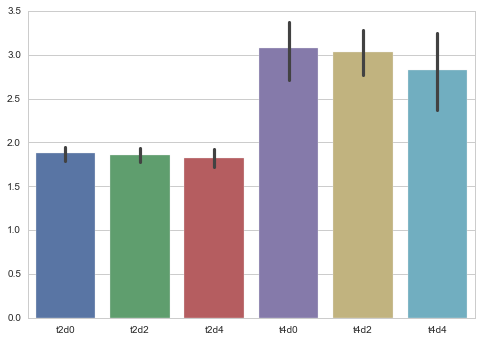

In [43]:
sns.barplot(data=Kchart)

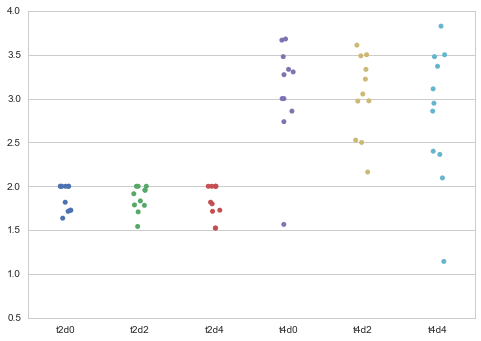

In [44]:
sns.stripplot(data=Kchart, jitter=True)

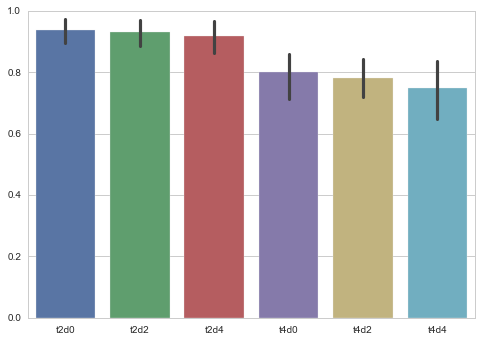

In [45]:
sns.barplot(data = hitChart)

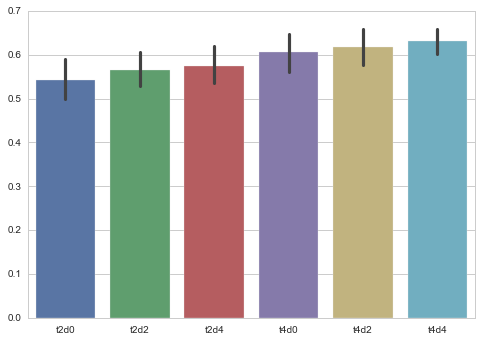

In [46]:
sns.barplot(data = RTchart)

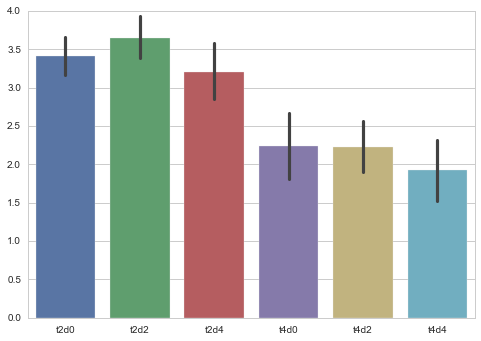

In [47]:
sns.barplot(data = dpChart)

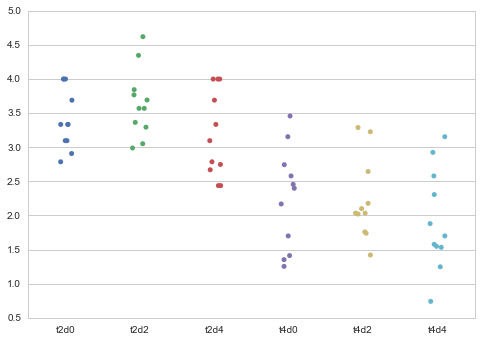

In [48]:
sns.stripplot(data=dpChart, jitter=True)